# 2012-2015년 데이터로 모델 만들기(남자)

In [1]:
import pandas as pd
import numpy as np
from itertools import *

In [2]:
dataset_male = pd.read_csv('./hospital_male_0802_test3.csv', encoding='cp949')
dataset_male = dataset_male[dataset_male['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True)#2016년 전만 추출
# dataset_male.drop(columns=['sex', 'heat_wave','cold_wave'], inplace=True)
# dataset_male.to_csv('male_df.csv', encoding='cp949')
#이창훈
male_df = dataset_male[
#     ['area','mm','dd','weekday','total_pop','elderly_ratio',
#                           'avg_hum','diff_hum','diff_temp','avg_ps','pm10_7b',
#                           'avg_age','min_temp','frequency', 'heat_wave','cold_wave']]
    ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                          'pm10_7b','diff_hum','diff_temp',#,'avg_ps',
                          'avg_age','min_max_ps', 'avg_hum','frequency']]
#이이슬
# male_df = dataset_male[['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#                           'pm10_31b','diff_hum','diff_temp','avg_ps',
#                           'o3','avg_age','min_max_ps', 'avg_hum','frequency']]
# fixed_df = dataset2[['area', 'mm', 'frequency','total_pop', 'elderly_ratio','so2','pm10','rhm_min_avg_dif','min_max_Ta','avg_ps']]
male_df

,area,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_age,min_max_ps,avg_hum,frequency
0,강원,1,6,0,0,772718,12.460044,30.158333,65.0,12.3,39.4,6.340000,58.333333,3.0
1,경기,1,6,0,0,6020446,7.432174,28.537404,27.0,7.9,36.1,5.500000,50.733333,4.0
2,경남,1,6,0,0,1665308,9.179443,26.719907,47.0,9.9,37.4,5.200000,44.916667,2.0
3,경북,1,6,0,0,1354649,12.336406,25.336806,70.0,12.0,39.5,5.688000,52.377778,6.0
4,광주,1,6,0,0,726529,7.679253,18.958333,15.0,3.9,35.3,4.100000,75.833333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,12,3,0,0,953881,16.198981,46.708333,65.0,12.3,42.1,6.892308,66.764033,0.0
24833,전북,12,3,0,0,930255,14.539347,72.548882,50.0,10.0,40.9,7.014286,73.750000,1.0
24834,제주,12,3,0,0,313428,11.063466,56.156250,33.0,4.9,38.7,7.523077,59.915541,0.0
24835,충남,12,3,0,0,1054439,13.477024,79.543252,55.0,9.0,40.2,6.800000,74.725225,0.0


In [3]:
# male_df['frequency'] = np.log1p(male_df['frequency'])

In [4]:
male_data = male_df.sample(frac=0.9, random_state=786) 
male_data_unseen = male_df.drop(male_data.index) 

male_data.reset_index(drop=True, inplace=True) 
male_data_unseen.reset_index(drop=True, inplace=True) 

print('Data for Modeling: ' + str(male_data.shape)) 
print('Unseen Data For Predictions: ' + str(male_data_unseen.shape)) 


Data for Modeling: (22353, 14)
Unseen Data For Predictions: (2484, 14)


## 모델 환경 설정 (Settinf up Environment in PyCaret)

- pycaret을 사용하기 전에 pycaret에 맞게 데이터를 설정
- set_up() 함수를 사용
- 기본적으로 data와 target을 입력

In [5]:
# 자동으로 데이터 유형 지정 
from pycaret.regression import *
male_data_s = setup(male_data, target = 'frequency', session_id=123, categorical_features=['area','mm','weekday',
                                                                                           'heat_wave','cold_wave'
                                                                                          ], 
                    remove_multicollinearity = True, multicollinearity_threshold = 0.6,  
    normalize=True)#, normalize_method='maxabs')


,Description,Value
0,Session id,123
1,Target,frequency
2,Target type,Regression
3,Data shape,"(22353, 15)"
4,Train data shape,"(15647, 15)"
5,Test data shape,"(6706, 15)"
6,Numeric features,12
7,Categorical features,5
8,Preprocess,True
9,Imputation type,simple


#### set_up(): pycaret을 사용하기 위한 data setting

- session_id: random_state와 같은 개념으로 같은 결과가 나올 수 있게 seed를 고정
- data: train 데이터 입력
- target = target 변수 이름을 입력

## 모델 생성 - 비교

- 여러 모델을 적합하여 성능을 비교하는 단계
- compare_models(): 다양한 모델 적합 후 성능 비교
    - fold: cross_validation의 fold를 지정 (default = 10)
    - sort: 정렬기준 지표 설정
    - n_select: 상위 n개의 모델 결과만 출력

In [6]:
# 이창훈
male_best_model_5 = compare_models(sort='RMSE', n_select = 5)
male_tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in male_best_model_5]
model_male = blend_models(estimator_list=male_tuned_top5, optimize = 'RMSE')

# 이이슬
# male_best_model_5 = compare_models(sort='RMSE', n_select = 5)
# model_male = ensemble_model(male_best_model_5[0], method='Bagging', choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.9128,1.5552,1.2467,0.4567,0.4901,0.4509,0.0320
lar,Least Angle Regression,0.9128,1.5552,1.2467,0.4567,0.4901,0.4509,0.0320
br,Bayesian Ridge,0.9129,1.5552,1.2467,0.4567,0.4901,0.4507,0.0330
lr,Linear Regression,0.9128,1.5555,1.2468,0.4566,0.4901,0.4511,0.1980
huber,Huber Regressor,0.8993,1.5755,1.2548,0.4496,0.4796,0.4475,0.0420
omp,Orthogonal Matching Pursuit,0.9146,1.5922,1.2615,0.4438,0.4924,0.4395,0.0320
et,Extra Trees Regressor,0.9442,1.6292,1.2761,0.4309,0.5048,0.4486,0.1270
lightgbm,Light Gradient Boosting Machine,0.9723,1.6773,1.2947,0.4141,0.5280,0.4413,0.0430
gbr,Gradient Boosting Regressor,1.0083,1.6971,1.3024,0.4072,0.5445,0.4357,0.2120
rf,Random Forest Regressor,0.9240,1.7099,1.3071,0.4028,0.5238,0.4692,0.3740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9223,1.6412,1.2811,0.4163,0.4930,0.4665
1,0.9283,1.6352,1.2788,0.4211,0.4931,0.4555
2,0.8913,1.4714,1.2130,0.4829,0.4789,0.4306
3,0.9037,1.5732,1.2543,0.4586,0.4845,0.4523
4,0.9101,1.4839,1.2182,0.4623,0.4979,0.4406
5,0.8923,1.4801,1.2166,0.5087,0.4782,0.4253
6,0.9120,1.5356,1.2392,0.4683,0.4933,0.4462
7,0.9100,1.4907,1.2209,0.4608,0.4908,0.4805
8,0.9577,1.7024,1.3048,0.4259,0.5076,0.4816


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9222,1.6414,1.2812,0.4163,0.4930,0.4666
1,0.9283,1.6353,1.2788,0.4211,0.4931,0.4556
2,0.8913,1.4713,1.2130,0.4829,0.4788,0.4307
3,0.9037,1.5731,1.2542,0.4587,0.4845,0.4524
4,0.9101,1.4839,1.2181,0.4623,0.4978,0.4407
5,0.8922,1.4800,1.2165,0.5088,0.4782,0.4254
6,0.9120,1.5356,1.2392,0.4683,0.4933,0.4463
7,0.9100,1.4907,1.2209,0.4608,0.4908,0.4806
8,0.9576,1.7025,1.3048,0.4259,0.5076,0.4817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9223,1.6411,1.2811,0.4164,0.4930,0.4664
1,0.9283,1.6352,1.2787,0.4211,0.4931,0.4554
2,0.8914,1.4715,1.2130,0.4829,0.4789,0.4305
3,0.9038,1.5732,1.2543,0.4586,0.4845,0.4522
4,0.9102,1.4839,1.2182,0.4623,0.4979,0.4405
5,0.8923,1.4802,1.2166,0.5087,0.4783,0.4252
6,0.9120,1.5356,1.2392,0.4683,0.4933,0.4461
7,0.9101,1.4907,1.2209,0.4608,0.4908,0.4804
8,0.9577,1.7024,1.3048,0.4259,0.5076,0.4815


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9235,1.6406,1.2809,0.4165,0.4936,0.4667
1,0.9282,1.6340,1.2783,0.4215,0.4930,0.4559
2,0.8909,1.4727,1.2136,0.4825,0.4784,0.4317
3,0.9027,1.5736,1.2544,0.4585,0.4841,0.4522
4,0.9094,1.4832,1.2179,0.4626,0.4973,0.4417
5,0.8914,1.4805,1.2168,0.5086,0.4778,0.4258
6,0.9112,1.5353,1.2391,0.4684,0.4927,0.4468
7,0.9098,1.4911,1.2211,0.4606,0.4907,0.4805
8,0.9569,1.7026,1.3048,0.4258,0.5072,0.4819


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9129,1.6363,1.2792,0.4181,0.4876,0.4552
1,0.9197,1.6369,1.2794,0.4205,0.4881,0.4437
2,0.8868,1.4855,1.2188,0.4780,0.4742,0.4226
3,0.8994,1.5821,1.2578,0.4556,0.4794,0.4432
4,0.9042,1.4892,1.2203,0.4604,0.4921,0.4318
5,0.8870,1.4963,1.2232,0.5033,0.4731,0.4153
6,0.9051,1.5352,1.2391,0.4684,0.4875,0.4370
7,0.9010,1.4896,1.2205,0.4612,0.4848,0.4690
8,0.9537,1.7094,1.3074,0.4235,0.5026,0.4724


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9204,1.6391,1.2803,0.4171,0.4919,0.4640
1,0.9263,1.6343,1.2784,0.4214,0.4920,0.4530
2,0.8902,1.4735,1.2139,0.4822,0.4778,0.4291
3,0.9023,1.5741,1.2546,0.4583,0.4833,0.4501
4,0.9085,1.4838,1.2181,0.4623,0.4965,0.4388
5,0.8909,1.4824,1.2175,0.5080,0.4770,0.4233
6,0.9101,1.5345,1.2387,0.4687,0.4920,0.4442
7,0.9078,1.4896,1.2205,0.4612,0.4895,0.4779
8,0.9564,1.7028,1.3049,0.4258,0.5064,0.4795


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 2016년 예측(남자)

In [7]:
test_male = pd.read_csv('./hospital_male_0802_test3.csv', encoding='cp949') #이 csv 파일은 2016년 데이터까지 포함한 것
# dataset3.drop(columns=['Unnamed: 0'], inplace=True)
test_male = test_male[
#     ['area','yyyy','mm','dd','weekday','total_pop','elderly_ratio',
#                           'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
#                           'avg_age','min_temp','frequency','heat_wave','cold_wave']]
    ['area','yyyy','dd','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                          'pm10_7b','diff_hum','diff_temp','avg_ps',
                          'avg_age','min_max_ps', 'avg_hum','frequency']]
test_male

,area,yyyy,dd,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,avg_hum,frequency
0,강원,2011,1,12,3,0,0,773278,12.405500,NaN,33.314706,3.845070,1027.575000,39.3,2.993750,83.354839,NaN
1,경기,2011,1,12,3,0,0,6015357,7.388123,NaN,28.227586,5.413208,1025.875000,36.0,3.175000,65.448276,NaN
2,경남,2011,1,12,3,0,0,1664755,9.147472,NaN,19.566667,3.112821,1023.921429,37.3,2.578571,74.583333,NaN
3,경북,2011,1,12,3,0,0,1355727,12.284700,NaN,28.800000,3.338182,1026.137500,39.5,2.684000,81.000000,NaN
4,광주,2011,1,12,3,0,0,725606,7.629485,NaN,23.066667,3.840000,1022.900000,35.3,3.000000,89.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31581,전남,2016,31,12,5,0,0,951889,16.677050,33.635000,49.000000,13.700000,1030.607692,42.6,2.573333,65.555094,NaN
31582,전북,2016,31,12,5,0,0,927505,15.011563,52.149758,42.000000,14.500000,1030.586667,41.4,3.466667,72.161486,NaN
31583,제주,2016,31,12,5,0,0,322545,11.278426,28.460474,31.000000,8.000000,1029.900000,39.2,3.046667,60.569257,NaN
31584,충남,2016,31,12,5,0,0,1064765,13.768860,71.473958,41.000000,11.700000,1030.100000,40.7,2.520000,75.118243,NaN


In [8]:
test_male2 = test_male[test_male['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)#2016년만 추출
test_male2

,area,yyyy,dd,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,avg_hum,frequency
0,강원,2016,1,1,4,0,0,781185,14.022671,61.954167,73.0,18.9,1030.230000,41.4,8.010000,58.196911,NaN
1,경기,2016,1,1,4,0,0,6306634,8.966558,42.487621,45.0,12.1,1031.633333,38.0,7.016667,70.844595,NaN
2,경남,2016,1,1,4,0,0,1695187,10.962802,29.128224,79.0,17.7,1031.175000,39.3,5.616667,52.099421,NaN
3,경북,2016,1,1,4,0,0,1356568,14.384461,38.389385,66.0,20.0,1030.309524,41.5,6.233333,57.314554,NaN
4,광주,2016,1,1,4,0,0,729995,9.572120,20.475000,40.0,10.0,1032.200000,37.4,5.850000,62.837838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,31,12,5,0,0,951889,16.677050,33.635000,49.0,13.7,1030.607692,42.6,2.573333,65.555094,NaN
6218,전북,2016,31,12,5,0,0,927505,15.011563,52.149758,42.0,14.5,1030.586667,41.4,3.466667,72.161486,NaN
6219,제주,2016,31,12,5,0,0,322545,11.278426,28.460474,31.0,8.0,1029.900000,39.2,3.046667,60.569257,NaN
6220,충남,2016,31,12,5,0,0,1064765,13.768860,71.473958,41.0,11.7,1030.100000,40.7,2.520000,75.118243,NaN


In [9]:
test_male3 = test_male2.drop(columns=['frequency','yyyy'])

In [10]:
male_final_model = finalize_model(model_male)
prediction_male = predict_model(male_final_model, data = test_male3)

In [11]:
# prediction_male['Label'] = prediction_male['Label'].round(0)
# prediction_male[['Label']]

# 2012-2015년 데이터로 모델 만들기(여자)

In [12]:
dataset_female = pd.read_csv('./hospital_female_0802_test3.csv', encoding='cp949')
dataset_female = dataset_female[dataset_female['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True)#2016년 전만 추출
# dataset_female.drop(columns=['sex'], inplace=True)
# dataset_female.to_csv('female_df.csv', encoding='cp949')
female_df = dataset_female[
#     ['area','mm','dd','weekday','total_pop','elderly_ratio',
#                           'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
#                           'avg_age','min_temp','frequency', 'heat_wave','cold_wave']]
    ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
          'pm10_7b','diff_hum','diff_temp',#,'avg_ps',
          'avg_age','min_max_ps','frequency']]
# fixed_df = dataset2[['area', 'mm', 'frequency','total_pop', 'elderly_ratio','so2','pm10','rhm_min_avg_dif','min_max_Ta','avg_ps']]
female_df

,area,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_age,min_max_ps,frequency
0,강원,1,6,0,0,762617,18.053361,30.158333,65.0,12.3,42.4,6.340000,3.0
1,경기,1,6,0,0,5928150,10.649039,28.537404,27.0,7.9,37.7,5.500000,5.0
2,경남,1,6,0,0,1644251,15.076105,26.719907,47.0,9.9,40.5,5.200000,1.0
3,경북,1,6,0,0,1342455,19.248690,25.336806,70.0,12.0,43.2,5.688000,1.0
4,광주,1,6,0,0,738784,11.037868,18.958333,15.0,3.9,37.6,4.100000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,12,3,0,0,955115,24.847060,46.708333,65.0,12.3,45.9,6.892308,3.0
24833,전북,12,3,0,0,939456,21.104873,72.548882,50.0,10.0,44.2,7.014286,0.0
24834,제주,12,3,0,0,310967,16.470236,56.156250,33.0,4.9,41.5,7.523077,0.0
24835,충남,12,3,0,0,1023210,19.459055,79.543252,55.0,9.0,43.1,6.800000,0.0


In [13]:
# female_df['frequency'] = np.log1p(female_df['frequency'])

In [14]:
female_data = female_df.sample(frac=0.9, random_state=786) 
female_data_unseen = female_df.drop(female_data.index) 

female_data.reset_index(drop=True, inplace=True) 
female_data_unseen.reset_index(drop=True, inplace=True) 

print('Data for Modeling: ' + str(female_data.shape)) 
print('Unseen Data For Predictions: ' + str(female_data_unseen.shape)) 



Data for Modeling: (22353, 13)
Unseen Data For Predictions: (2484, 13)


In [15]:
female_data

,area,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_age,min_max_ps,frequency
0,세종,10,1,0,0,58172,18.113525,15.625000,54.0,15.500,41.6,0.400000,0.0
1,대구,5,3,0,0,1254686,13.887140,43.726190,55.0,10.300,41.2,7.300000,1.0
2,전북,1,6,0,0,939716,18.846226,50.974537,64.0,8.900,42.2,5.713333,3.0
3,서울,10,2,0,0,5101462,13.790870,45.331092,65.0,13.000,41.4,281.825000,2.0
4,서울,7,0,0,0,5168051,11.833958,33.968521,50.0,10.000,39.9,2.900000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22348,강원,11,6,0,0,764538,18.490121,28.020833,55.0,15.875,42.8,9.813333,1.0
22349,세종,9,4,0,0,53005,19.026507,32.333333,43.0,9.400,42.1,5.637500,0.0
22350,서울,2,6,0,0,5177690,11.578040,32.512536,35.0,7.900,39.7,4.600000,2.0
22351,제주,6,6,0,0,293865,16.053630,16.734472,31.0,6.200,40.6,3.300000,0.0


In [16]:
# 자동으로 데이터 유형 지정 
from pycaret.regression import *
female_data_s = setup(female_data, target = 'frequency', session_id=123, categorical_features=['area','mm','weekday',
                                                                                               'heat_wave',
                                                                                                'cold_wave'
                                                                                              ],
           remove_multicollinearity = True, multicollinearity_threshold = 0.6, 
            normalize=True)
#normalize_method='maxabs')


,Description,Value
0,Session id,123
1,Target,frequency
2,Target type,Regression
3,Data shape,"(22353, 14)"
4,Train data shape,"(15647, 14)"
5,Test data shape,"(6706, 14)"
6,Numeric features,11
7,Categorical features,5
8,Preprocess,True
9,Imputation type,simple


In [17]:
# 이창훈
female_best_model_5 = compare_models(sort='RMSE', n_select = 5)
# female_tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in female_best_model_5]
model_female = blend_models(female_best_model_5, optimize='RMSE')

# 이이슬
# female_best_model_5 = compare_models(sort='RMSE', n_select = 5)
# female_tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in female_best_model_5]
# model_female = stack_models(female_tuned_top5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.9028,1.5016,1.2252,0.4499,0.4842,0.4578,0.0410
ridge,Ridge Regression,0.9029,1.5017,1.2252,0.4498,0.4842,0.4580,0.0330
lar,Least Angle Regression,0.9029,1.5017,1.2252,0.4498,0.4842,0.4580,0.0290
br,Bayesian Ridge,0.9029,1.5017,1.2252,0.4498,0.4842,0.4577,0.0300
huber,Huber Regressor,0.8906,1.5233,1.2340,0.4420,0.4735,0.4549,0.0340
omp,Orthogonal Matching Pursuit,0.9017,1.5443,1.2426,0.4342,0.4862,0.4452,0.0290
et,Extra Trees Regressor,0.9067,1.5452,1.2429,0.4339,0.4870,0.4357,0.1230
lightgbm,Light Gradient Boosting Machine,0.9448,1.6239,1.2741,0.4051,0.5136,0.4161,0.0420
rf,Random Forest Regressor,0.9171,1.6725,1.2931,0.3871,0.5214,0.4525,0.3180
gbr,Gradient Boosting Regressor,0.9879,1.6739,1.2935,0.3869,0.5292,0.4246,0.1840


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8923,1.4343,1.1976,0.4600,0.4749,0.4628
1,0.9205,1.5372,1.2398,0.4504,0.4915,0.4531
2,0.9035,1.5280,1.2361,0.4563,0.4836,0.4465
3,0.8695,1.4670,1.2112,0.4566,0.4658,0.4470
4,0.8979,1.5548,1.2469,0.4760,0.4748,0.4159
5,0.8987,1.4691,1.2121,0.4284,0.4858,0.4802
6,0.9336,1.6242,1.2744,0.4149,0.4992,0.4536
7,0.8711,1.4338,1.1974,0.4631,0.4710,0.4660
8,0.8996,1.4668,1.2111,0.4585,0.4849,0.4694


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 2016년 예측(여자)

In [18]:
test_female = pd.read_csv('./hospital_female_0802_test3.csv', encoding='cp949') #이 csv 파일은 2016년 데이터까지 포함한 것
# dataset3.drop(columns=['Unnamed: 0'], inplace=True)
test_female = test_female[
#     ['area','yyyy','mm','dd','weekday','total_pop','elderly_ratio',
#                           'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
#                           'avg_age','min_temp','frequency','heat_wave','cold_wave']]
    ['area','yyyy','dd','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
          'pm10_7b','diff_hum','diff_temp','avg_ps',
          'avg_age', 'min_max_ps','frequency']]
test_female

,area,yyyy,dd,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,frequency
0,강원,2011,1,12,3,0,0,763170,17.989439,NaN,33.314706,3.845070,1027.575000,42.3,2.993750,NaN
1,경기,2011,1,12,3,0,0,5922058,10.605097,NaN,28.227586,5.413208,1025.875000,37.7,3.175000,NaN
2,경남,2011,1,12,3,0,0,1644010,15.039264,NaN,19.566667,3.112821,1023.921429,40.5,2.578571,NaN
3,경북,2011,1,12,3,0,0,1343468,19.192046,NaN,28.800000,3.338182,1026.137500,43.1,2.684000,NaN
4,광주,2011,1,12,3,0,0,737858,10.984634,NaN,23.066667,3.840000,1022.900000,37.6,3.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31581,전남,2016,31,12,5,0,0,952025,25.227174,33.635000,49.000000,13.700000,1030.607692,46.4,2.573333,NaN
31582,전북,2016,31,12,5,0,0,937286,21.548385,52.149758,42.000000,14.500000,1030.586667,44.7,3.466667,NaN
31583,제주,2016,31,12,5,0,0,319052,16.552474,28.460474,31.000000,8.000000,1029.900000,41.9,3.046667,NaN
31584,충남,2016,31,12,5,0,0,1031962,19.719912,71.473958,41.000000,11.700000,1030.100000,43.5,2.520000,NaN


In [19]:
test_female2 = test_female[test_female['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)#2016년만 추출
test_female2

,area,yyyy,dd,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,frequency
0,강원,2016,1,1,4,0,0,768008,19.916980,61.954167,73.0,18.9,1030.230000,44.5,8.010000,NaN
1,경기,2016,1,1,4,0,0,6229840,12.194759,42.487621,45.0,12.1,1031.633333,39.7,7.016667,NaN
2,경남,2016,1,1,4,0,0,1669577,16.753405,29.128224,79.0,17.7,1031.175000,42.4,5.616667,NaN
3,경북,2016,1,1,4,0,0,1344592,21.253882,38.389385,66.0,20.0,1030.309524,45.1,6.233333,NaN
4,광주,2016,1,1,4,0,0,742807,13.091826,20.475000,40.0,10.0,1032.200000,39.7,5.850000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,31,12,5,0,0,952025,25.227174,33.635000,49.0,13.7,1030.607692,46.4,2.573333,NaN
6218,전북,2016,31,12,5,0,0,937286,21.548385,52.149758,42.0,14.5,1030.586667,44.7,3.466667,NaN
6219,제주,2016,31,12,5,0,0,319052,16.552474,28.460474,31.0,8.0,1029.900000,41.9,3.046667,NaN
6220,충남,2016,31,12,5,0,0,1031962,19.719912,71.473958,41.0,11.7,1030.100000,43.5,2.520000,NaN


In [20]:
test_female3 = test_female2.drop(columns=['frequency','yyyy'])

In [21]:
female_final_model = finalize_model(model_female)

prediction_female = predict_model(female_final_model, data = test_female3)

In [22]:
# prediction_female['Label'] = prediction_female['Label'].round(0)
# prediction_female[['Label']]

# 남자 여자 예측 데이터 합치기

In [23]:
test_male2

,area,yyyy,dd,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,avg_hum,frequency
0,강원,2016,1,1,4,0,0,781185,14.022671,61.954167,73.0,18.9,1030.230000,41.4,8.010000,58.196911,NaN
1,경기,2016,1,1,4,0,0,6306634,8.966558,42.487621,45.0,12.1,1031.633333,38.0,7.016667,70.844595,NaN
2,경남,2016,1,1,4,0,0,1695187,10.962802,29.128224,79.0,17.7,1031.175000,39.3,5.616667,52.099421,NaN
3,경북,2016,1,1,4,0,0,1356568,14.384461,38.389385,66.0,20.0,1030.309524,41.5,6.233333,57.314554,NaN
4,광주,2016,1,1,4,0,0,729995,9.572120,20.475000,40.0,10.0,1032.200000,37.4,5.850000,62.837838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,31,12,5,0,0,951889,16.677050,33.635000,49.0,13.7,1030.607692,42.6,2.573333,65.555094,NaN
6218,전북,2016,31,12,5,0,0,927505,15.011563,52.149758,42.0,14.5,1030.586667,41.4,3.466667,72.161486,NaN
6219,제주,2016,31,12,5,0,0,322545,11.278426,28.460474,31.0,8.0,1029.900000,39.2,3.046667,60.569257,NaN
6220,충남,2016,31,12,5,0,0,1064765,13.768860,71.473958,41.0,11.7,1030.100000,40.7,2.520000,75.118243,NaN


In [24]:
hap_male = pd.concat([test_male2[['area','yyyy','mm','dd']], prediction_male['Label']], axis=1)
hap_male['sex'] = 1
hap_male

,area,yyyy,mm,dd,Label,sex
0,강원,2016,1,1,1.092680,1
1,경기,2016,1,1,4.552876,1
2,경남,2016,1,1,1.966269,1
3,경북,2016,1,1,1.872092,1
4,광주,2016,1,1,0.644500,1
...,...,...,...,...,...,...
6217,전남,2016,12,31,1.182999,1
6218,전북,2016,12,31,0.910102,1
6219,제주,2016,12,31,0.031683,1
6220,충남,2016,12,31,0.861462,1


In [25]:
hap_female = pd.concat([test_female2[['area','yyyy','mm','dd']], prediction_female['Label']], axis=1)
hap_female['sex'] = 2
hap_female

,area,yyyy,mm,dd,Label,sex
0,강원,2016,1,1,0.910354,2
1,경기,2016,1,1,4.316603,2
2,경남,2016,1,1,2.001668,2
3,경북,2016,1,1,1.864929,2
4,광주,2016,1,1,0.746888,2
...,...,...,...,...,...,...
6217,전남,2016,12,31,1.410657,2
6218,전북,2016,12,31,1.184236,2
6219,제주,2016,12,31,0.006723,2
6220,충남,2016,12,31,0.819072,2


In [26]:
verify = pd.read_csv('./edited_data/2-2_검증데이터셋.csv', encoding='cp949')
verify

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,NaN
1,2016-01-01,경기,1,NaN
2,2016-01-01,경남,1,NaN
3,2016-01-01,경북,1,NaN
4,2016-01-01,광주,1,NaN
...,...,...,...,...
12439,2016-12-31,전남,2,NaN
12440,2016-12-31,전북,2,NaN
12441,2016-12-31,제주,2,NaN
12442,2016-12-31,충남,2,NaN


In [27]:
hap_male['yyyy'] = hap_male['yyyy'].astype('int')
hap_male['mm'] = hap_male['mm'].astype('int')
hap_male['dd'] = hap_male['dd'].astype('int')

hap_female['yyyy'] = hap_female['yyyy'].astype('int')
hap_female['mm'] = hap_female['mm'].astype('int')
hap_female['dd'] = hap_female['dd'].astype('int')

In [28]:
hap_male['dateInt']=hap_male['yyyy'].astype(str) + hap_male['mm'].astype(str).str.zfill(2)+ hap_male['dd'].astype(str).str.zfill(2)
hap_male['date'] = pd.to_datetime(hap_male['dateInt'], format='%Y%m%d')
hap_male.drop(columns=['dateInt'], inplace=True)

hap_female['dateInt']=hap_female['yyyy'].astype(str) + hap_female['mm'].astype(str).str.zfill(2)+ hap_female['dd'].astype(str).str.zfill(2)
hap_female['date'] = pd.to_datetime(hap_female['dateInt'], format='%Y%m%d')
hap_female.drop(columns=['dateInt'], inplace=True)

In [29]:
hap_male.sort_values(['date', 'area']).reset_index(drop=True)
hap_female.sort_values(['date', 'area']).reset_index(drop=True)


,area,yyyy,mm,dd,Label,sex,date
0,강원,2016,1,1,0.910354,2,2016-01-01
1,경기,2016,1,1,4.316603,2,2016-01-01
2,경남,2016,1,1,2.001668,2,2016-01-01
3,경북,2016,1,1,1.864929,2,2016-01-01
4,광주,2016,1,1,0.746888,2,2016-01-01
...,...,...,...,...,...,...,...
6217,전남,2016,12,31,1.410657,2,2016-12-31
6218,전북,2016,12,31,1.184236,2,2016-12-31
6219,제주,2016,12,31,0.006723,2,2016-12-31
6220,충남,2016,12,31,0.819072,2,2016-12-31


In [30]:
hap = pd.concat([hap_male, hap_female], axis=0).reset_index(drop=True)
hap

,area,yyyy,mm,dd,Label,sex,date
0,강원,2016,1,1,1.092680,1,2016-01-01
1,경기,2016,1,1,4.552876,1,2016-01-01
2,경남,2016,1,1,1.966269,1,2016-01-01
3,경북,2016,1,1,1.872092,1,2016-01-01
4,광주,2016,1,1,0.644500,1,2016-01-01
...,...,...,...,...,...,...,...
12439,전남,2016,12,31,1.410657,2,2016-12-31
12440,전북,2016,12,31,1.184236,2,2016-12-31
12441,제주,2016,12,31,0.006723,2,2016-12-31
12442,충남,2016,12,31,0.819072,2,2016-12-31


In [31]:
# verify['frequency'] = hap['Label']
# verify

In [32]:
# verify['frequency'] = np.expm1(verify['frequency'])

In [33]:
# verify

In [34]:
# verify.loc[verify['frequency'] < 0, 'frequency'] = 0

In [35]:
# verify.to_csv('./220023_0808_11.csv', encoding='cp949', index=False)

In [36]:
hap['date'] = hap['date'].astype(str)

In [37]:
verify_ = verify.merge(hap, how='left', left_on = ['yyyymmdd','area','sex'], right_on = ['date','area','sex'])[['yyyymmdd','area','sex','Label']]
verify_ = verify_.rename(columns = {'Label':'frequency'})
verify_.loc[verify_['frequency'] < 0, 'frequency'] = 0
verify_

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.092680
1,2016-01-01,경기,1,4.552876
2,2016-01-01,경남,1,1.966269
3,2016-01-01,경북,1,1.872092
4,2016-01-01,광주,1,0.644500
...,...,...,...,...
12439,2016-12-31,전남,2,1.410657
12440,2016-12-31,전북,2,1.184236
12441,2016-12-31,제주,2,0.006723
12442,2016-12-31,충남,2,0.819072


In [38]:
verify_.sort_values(['yyyymmdd', 'area']).reset_index(drop=True)

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.092680
1,2016-01-01,강원,2,0.910354
2,2016-01-01,경기,1,4.552876
3,2016-01-01,경기,2,4.316603
4,2016-01-01,경남,1,1.966269
...,...,...,...,...
12439,2016-12-31,제주,2,0.006723
12440,2016-12-31,충남,1,0.861462
12441,2016-12-31,충남,2,0.819072
12442,2016-12-31,충북,1,0.779768


In [39]:
# verify_['frequency'] = np.expm1(verify_['frequency'])
verify_

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.092680
1,2016-01-01,경기,1,4.552876
2,2016-01-01,경남,1,1.966269
3,2016-01-01,경북,1,1.872092
4,2016-01-01,광주,1,0.644500
...,...,...,...,...
12439,2016-12-31,전남,2,1.410657
12440,2016-12-31,전북,2,1.184236
12441,2016-12-31,제주,2,0.006723
12442,2016-12-31,충남,2,0.819072


In [40]:
verify_.to_csv('./220023_0808_12.csv', encoding='cp949', index=False)

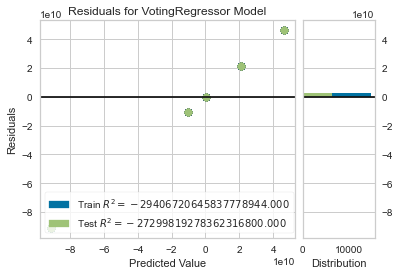

In [41]:
plot_model(female_final_model)

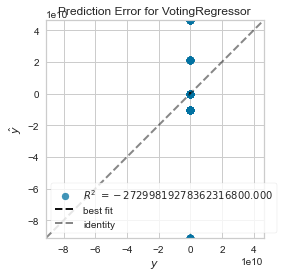

In [42]:
plot_model(female_final_model, plot='error')

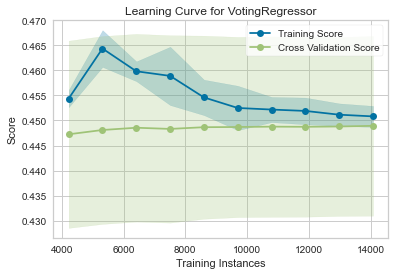

In [43]:
plot_model(female_final_model, plot='learning')

In [44]:
evaluate_model(female_final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…